In [1]:
!pip3 show gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /home/fox/.local/lib/python3.10/site-packages
Requires: numpy, scipy, six, smart-open
Required-by: 


In [10]:
from datetime import datetime
import os
import wget
import numpy as np
from zipfile import *
from collections import defaultdict
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gensim.models import FastText
import gzip
from ipynb.fs.defs.functions_and_classes import Dataset, Datapoint
from ipynb.fs.defs.functions_and_classes import *

In [70]:
#model = 'word2vec'
model = 'glove'
#model = 'fasttext'
dim = 25
language = 'he'
#language = 'en'

# Loading

In [71]:
"""def build_dict_from_model(model, vocab):
    #For processing Word2Vec .model files. The .npy files are also needed. Works with gensim 3.6
    embedding = defaultdict()
    for word in list(vocab):
        embedding[word] = model[word]
    display_embedding_properties(embedding)
    return embedding"""

'def build_dict_from_model(model, vocab):\n    #For processing Word2Vec .model files. The .npy files are also needed. Works with gensim 3.6\n    embedding = defaultdict()\n    for word in list(vocab):\n        embedding[word] = model[word]\n    display_embedding_properties(embedding)\n    return embedding'

In [72]:
inp = f'{model}_{dim}_{language}_vectors.txt'
header = False
print(f'Input: {inp}')
if model == 'fasttext' and language == 'he':
    # we have to load a pretrained model
    if inp not in os.listdir('./models/raws/'):
        URL = 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.he.vec'
        response = wget.download(URL, f'./models/raws/fasttext_{dim}_{language}_vectors.txt')
    header = True
embedding = build_dict_from_vector_file('./models/raws/', inp, header)

# The fasttext model has less entries in the .vec format for some reason???

Input: glove_25_he_vectors.txt
Processed 0
Processed 50000
Processed 100000
Processed 150000
Processed 200000
Processed 250000
Processed 300000
Processed 350000
Processed 400000
Processed 450000
Processed 500000
Processed 550000
Embedding entries: 595529
Embedding dimension: 25


In [73]:
if model == 'glove' and language == 'en' and dim == 300:
    if f'glove_{dim}_{language}_vectors.txt' not in os.listdir('./models/raws/'):
    # We'll have to regenerate the model
        if 'glove.42B.300d.zip' not in os.listdir('./models/raws/'):
        # We'll have to re-download the model
            URL = "https://nlp.stanford.edu/data/glove.42B.300d.zip"
            response = wget.download(URL, './models/raws/glove.42B.300d.zip')
        with ZipFile('./models/raws/glove.42B.300d.zip', 'r') as zipObj:
            # Extract all the contents of zip file in current directory
            zipObj.extractall(f'./models/raws/')
            #!wget https://nlp.stanford.edu/data/glove.42B.300d.zip
            #!unzip glove.42B.300d.zip
        os.rename('./models/raws/glove.42B.300d.txt', f'./models/raws/glove_{dim}_{language}_vectors.txt')
        #os.remove('./models/raws/glove.42B.300d.zip')
    print(f'Loading started {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')
    embedding = build_dict_from_vector_file('./models/raws/', f'glove_{dim}_{language}_vectors.txt')
    print(f'Loading ended {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')

# Dataset adjustment

In [74]:
"""dataset = [{'noun':'מחשב', 'denom':['למחשב',''], 'non_denom':['לחשב','להתחשב'], 'others':['לחשוב','להחשיב','להיחשב'], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לחשב'},
           {'noun':'תחזוקה', 'denom':['לתחזק',''], 'non_denom':['לחזק','להתחזק'], 'others':['','להחזיק',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מחזור', 'denom':['למחזר',''], 'non_denom':['לחזר','להתחזר'], 'others':['לחזור','להחזיר',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'חשבון', 'denom':['','להתחשבן'], 'non_denom':['לחשב','להתחשב'], 'others':['לחשוב','להחשיב','להיחשב'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תקשורת', 'denom':['לתקשר',''], 'non_denom':['לקשר','להתקשר'], 'others':['לקשור','','להיקשר'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תפקידים', 'denom':['לתפקד',''], 'non_denom':['לפקד','להתפקד'], 'others':['לפקוד','להפקיד','להיפקד'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להפקיד'},
           {'noun':'תרגילים', 'denom':['לתרגל',''], 'non_denom':['לרגל','להתרגל'], 'others':['','להרגיל',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להרגיל'},
           {'noun':'פלצן', 'denom':['','להתפלצן'], 'non_denom':['','להתפלץ'], 'others':['','להפליץ',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תזמורת', 'denom':['לתזמר',''], 'non_denom':['לזמר',''], 'others':['','',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תזמון', 'denom':['לתזמן',''], 'non_denom':['לזמן','להזדמן'], 'others':['','להזמין',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'סקרנים', 'denom':['לסקרן','להסתקרן'], 'non_denom':['לסקר',''], 'others':['לסקור','','להיסקר'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לסקרן'},
           {'noun':'תקציר', 'denom':['לתקצר',''], 'non_denom':['לקצר',''], 'others':['לקצור','להתקצר','להיקצר'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מלכודת', 'denom':['למלכד',''], 'non_denom':['ללכד','להתלכד'], 'others':['ללכוד','','להילכד'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'אבטחה', 'denom':['לאבטח',''], 'non_denom':['לבטח',''], 'others':['לבטוח','להבטיח',''], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לאבטח'},
           {'noun':'קמצן', 'denom':['','להתקמצן'], 'non_denom':['לקמץ',''], 'others':['','',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'שלהבת', 'denom':['לשלהב','להשתלהב'], 'non_denom':['','להתלהב'], 'others':['','להלהיב',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'עצבני', 'denom':['לעצבן','להתעצבן'], 'non_denom':['לעצב','להתעצב'], 'others':['','להעציב','להיעצב'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מרכז', 'denom':['למרכז','להתמרכז'], 'non_denom':['לרכז','להתרכז'], 'others':['','',''], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לרכז'},
           {'noun':'תסביך', 'denom':['לתסבך',''], 'non_denom':['לסבך','להסתבך'], 'others':['','',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מסגרת', 'denom':['למסגר',''], 'non_denom':['','להסתגר'], 'others':['לסגור','להסגיר','להיסגר'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'אכזבות', 'denom':['לאכזב','להתאכזב'], 'non_denom':['לכזב',''], 'others':['','להכזיב',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לאכזב'},
           {'noun':'מסחר', 'denom':['','להתמסחר'], 'non_denom':['',''], 'others':['לסחור','','להיסחר'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תעתיקים', 'denom':['לתעתק',''], 'non_denom':['',''], 'others':['','להעתיק',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להעתיק'},
           {'noun':'תדריכים', 'denom':['לתדרך',''], 'non_denom':['',''], 'others':['לדרוך','להדריך','להידרך'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להדריך'},
           {'noun':'תמריצים', 'denom':['לתמרץ',''], 'non_denom':['',''], 'others':['','להמריץ',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להמריץ'},
           {'noun':'תקציבים', 'denom':['לתקצב',''], 'non_denom':['',''], 'others':['לקצוב','להקציב','להיקצב'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להקציב'},
           {'noun':'תצפית', 'denom':['לתצפת',''], 'non_denom':['',''], 'others':['לצפות','',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'אבחנות', 'denom':['לאבחן',''], 'non_denom':['',''], 'others':['לבחון','להבחין','להיבחן'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לאבחן'},
           {'noun':'תחקיר', 'denom':['לתחקר',''], 'non_denom':['',''], 'others':['לחקור','','להיחקר'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תסריטים', 'denom':['לתסרט',''], 'non_denom':['',''], 'others':['','להסריט',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להסריט'},
           {'noun':'תקליטים', 'denom':['לתקלט',''], 'non_denom':['',''], 'others':['לקלוט','להקליט','להיקלט'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להקליט'},
           {'noun':'אזכרות', 'denom':['לאזכר',''], 'non_denom':['',''], 'others':['לזכור','להזכיר','להיזכר'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לאזכר'},
           {'noun':'מספר', 'denom':['למספר',''], 'non_denom':['לספר','להסתפר'], 'others':['לספור','','להיספר'], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לספר'},
           {'noun':'טרחנים', 'denom':['לטרחן',''], 'non_denom':['',''], 'others':['לטרוח','להטריח',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לטרחן'},
           {'noun':'מרפק', 'denom':['למרפק',''], 'non_denom':['','להתרפק'], 'others':['','',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מסמר', 'denom':['למסמר',''], 'non_denom':['לסמר',''], 'others':['לסמור','',''], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לסמר'},
           {'noun':'אזרחים', 'denom':['לאזרח','להתאזרח'], 'non_denom':['',''], 'others':['לזרוח','',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לאזרח'},
           {'noun':'אגרופים', 'denom':['','להתאגרף'], 'non_denom':['',''], 'others':['לגרוף','','להיגרף'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לגרוף'},
           {'noun':'מסכן', 'denom':['למסכן','להתמסכן'], 'non_denom':['לסכן','להסתכן'], 'others':['','',''], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לסכן'},
           {'noun':'תגמולים', 'denom':['לתגמל',''], 'non_denom':['','להיגמל'], 'others':['לגמול','','להיגמל'], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לגמול'},
           {'noun':'חרבון', 'denom':['לחרבן','להתחרבן'], 'non_denom':['לחרב','להתחרב'], 'others':['','להחריב','להיחרב'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'צלחות', 'denom':['לצלחת',''], 'non_denom':['',''], 'others':['לצלוח','להצליח',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לצלוח'},
           {'noun':'משכון', 'denom':['למשכן',''], 'non_denom':['לשכן','להשתכן'], 'others':['לשכון','להשכין',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תגבורת', 'denom':['לתגבר',''], 'non_denom':['','להתגבר'], 'others':['לגבור','להגביר',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מסמך', 'denom':['למסמך',''], 'non_denom':['','להסתמך'], 'others':['לסמוך','להסמיך',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תאריכים', 'denom':['לתארך',''], 'non_denom':['','להתארך'], 'others':['לארוך','להאריך',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'להאריך'},
           {'noun':'תכסיס', 'denom':['לתכסס',''], 'non_denom':['',''], 'others':['לכסוס','',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מזרח', 'denom':['','להתמזרח'], 'non_denom':['',''], 'others':['לזרוח','להזריח',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מערב', 'denom':['','להתמערב'], 'non_denom':['לערב','להתערב'], 'others':['לערוב','',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לערב'},
           {'noun':'מקצוע', 'denom':['למקצע','להתמקצע'], 'non_denom':['',''], 'others':['לקצוע','',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'תזכורת', 'denom':['לתזכר',''], 'non_denom':['',''], 'others':['לזכור','להזכיר','להיזכר'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'מגדרים', 'denom':['למגדר',''], 'non_denom':['לגדר',''], 'others':['','להגדיר',''], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לגדר'},
           {'noun':'פרשנים', 'denom':['לפרשן','להתפרשן'], 'non_denom':['לפרש','להתפרש'], 'others':['לפרוש','להפריש',''], 'ambig_inflected':False, 'ambig_uninflected':True, 'ambig_with':'לפרשן'},
           {'noun':'קורבן', 'denom':['','להתקרבן'], 'non_denom':['','להתקרב'], 'others':['','להקריב',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},
           {'noun':'חמצן', 'denom':['לחמצן','להתחמצן'], 'non_denom':['',''], 'others':['','להחמיץ','להיחמץ'], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לחמצן'},]"""

"dataset = [{'noun':'מחשב', 'denom':['למחשב',''], 'non_denom':['לחשב','להתחשב'], 'others':['לחשוב','להחשיב','להיחשב'], 'ambig_inflected':True, 'ambig_uninflected':True, 'ambig_with':'לחשב'},\n           {'noun':'תחזוקה', 'denom':['לתחזק',''], 'non_denom':['לחזק','להתחזק'], 'others':['','להחזיק',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},\n           {'noun':'מחזור', 'denom':['למחזר',''], 'non_denom':['לחזר','להתחזר'], 'others':['לחזור','להחזיר',''], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},\n           {'noun':'חשבון', 'denom':['','להתחשבן'], 'non_denom':['לחשב','להתחשב'], 'others':['לחשוב','להחשיב','להיחשב'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},\n           {'noun':'תקשורת', 'denom':['לתקשר',''], 'non_denom':['לקשר','להתקשר'], 'others':['לקשור','','להיקשר'], 'ambig_inflected':False, 'ambig_uninflected':False, 'ambig_with':''},\n           {'noun':'תפקידים', 'denom':['לתפקד',''], 'non_denom':['ל

In [75]:
"""with open('./hebrew dataset/definitive_dataset.csv' ,'w') as f:
    f.write('Noun,Denominal(s),Non-denominal(s),Other(s)\n')
    for dp in dataset:
        n = dp['noun']
        dns = dp['denom']
        dns = [dn for dn in dns if dn != '']
        dns = ' '.join(dns)
        ndns = dp['non_denom']
        ndns = [ndn for ndn in ndns if ndn != '']
        ndns = ' '.join(ndns)
        others = dp['others']
        others = [other for other in others if other != '']
        others = ' '.join(others)
        print(dns)
        print(ndns)
        print(others)
        f.write(f'{n},{dns},{ndns},{others}\n')"""

"with open('./hebrew dataset/definitive_dataset.csv' ,'w') as f:\n    f.write('Noun,Denominal(s),Non-denominal(s),Other(s)\n')\n    for dp in dataset:\n        n = dp['noun']\n        dns = dp['denom']\n        dns = [dn for dn in dns if dn != '']\n        dns = ' '.join(dns)\n        ndns = dp['non_denom']\n        ndns = [ndn for ndn in ndns if ndn != '']\n        ndns = ' '.join(ndns)\n        others = dp['others']\n        others = [other for other in others if other != '']\n        others = ' '.join(others)\n        print(dns)\n        print(ndns)\n        print(others)\n        f.write(f'{n},{dns},{ndns},{others}\n')"

In [76]:
dataset = load_dataset_from_csv('./datasets/he/definitive_dataset.csv')

In [77]:
dataset.display_content()

Datapoint #1:
Noun: מחשב
Denominal(s): ['למחשב']
Non-denominal(s): ['לחשב', 'להתחשב']
Other(s): ['לחשוב', 'להחשיב', 'להיחשב']
Datapoint #2:
Noun: תחזוקה
Denominal(s): ['לתחזק']
Non-denominal(s): ['לחזק', 'להתחזק']
Other(s): ['להחזיק']
Datapoint #3:
Noun: מחזור
Denominal(s): ['למחזר']
Non-denominal(s): ['לחזר', 'להתחזר']
Other(s): ['לחזור', 'להחזיר']
Datapoint #4:
Noun: חשבון
Denominal(s): ['להתחשבן']
Non-denominal(s): ['לחשב', 'להתחשב']
Other(s): ['לחשוב', 'להחשיב', 'להיחשב']
Datapoint #5:
Noun: תקשורת
Denominal(s): ['לתקשר']
Non-denominal(s): ['לקשר', 'להתקשר']
Other(s): ['לקשור', 'להיקשר']
Datapoint #6:
Noun: תפקידים
Denominal(s): ['לתפקד']
Non-denominal(s): ['לפקד', 'להתפקד']
Other(s): ['לפקוד', 'להפקיד', 'להיפקד']
Datapoint #7:
Noun: תרגילים
Denominal(s): ['לתרגל']
Non-denominal(s): ['לרגל', 'להתרגל']
Other(s): ['להרגיל']
Datapoint #8:
Noun: פלצן
Denominal(s): ['להתפלצן']
Non-denominal(s): ['להתפלץ']
Other(s): ['להפליץ']
Datapoint #9:
Noun: תזמורת
Denominal(s): ['לתזמר']
Non-denomi

In [78]:
dataset.filter_against_embedding(embedding)

Number of datapoints before adjustment: 55
Number of datapoints after adjustment: 29


In [79]:
triplets = dataset.get_triplets()
lexicon = dataset.get_lexicon()
vecs = dataset.get_vecs(embedding)

In [80]:
len(triplets)

31

# Reduction

In [81]:
"""def get_target_dim(vecs):
    cov_matrix = np.cov(vecs.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    #sort the eigenvalues in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    #similarly sort the eigenvectors 
    sorted_eigenvectors = eigenvectors[:,sorted_index]
    target_dim = len([ev for ev in eigenvalues if ev >= 1])
    eigenvector_subset = sorted_eigenvectors[:,0:target_dim]
    print(eigenvector_subset.shape)
    #vecs_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
    print(vecs.shape)
    return target_dim, np.dot(vecs, eigenvector_subset)"""
    
def reduce_dim(words, vecs):
    pca = PCA(n_components=.9, svd_solver='full')
    """pca.fit(vecs)
    print(f'Intermediate dimension: {pca.n_components_}')
    target_dim = len([sv for sv in pca.singular_values_ if sv >=1])
    pca = PCA(n_components=target_dim)"""
    all_vecs_reduced = pca.fit_transform(vecs)
    print(f'Initial dimension: {len(vecs[0])}')
    print(f'Final dimension: {pca.n_components_}')
    print(f'Explained variance: {np.sum(pca.explained_variance_ratio_)}')
    plt.plot(pca.explained_variance_ratio_)
    plt.title('Explained variance ratio for each component of the PCA \n (sorted from most significant to least significant)')
    plt.show()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title('Cumulative sum of the explained variance ratios of the PCA')
    plt.show()
    
    return dict(zip(words, all_vecs_reduced))

Initial dimension: 25
Final dimension: 17
Explained variance: 0.9171297861840458


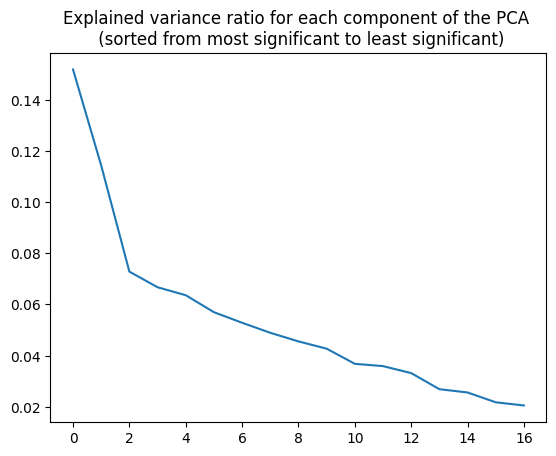

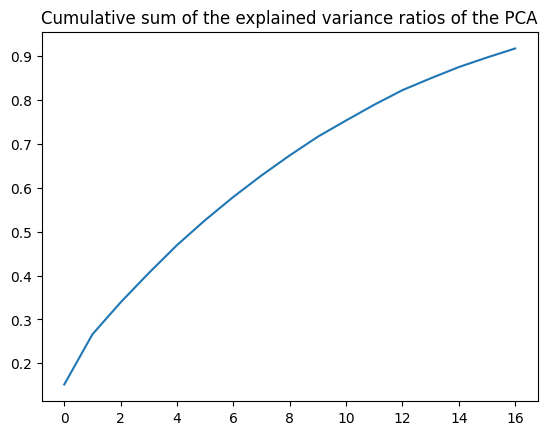

In [82]:
reduced_embedding = reduce_dim(lexicon, vecs)

# Save

In [83]:
def write_dict_to_vector_file(embedding):
    fname = f'{model}_{dim}_{language}_vectors_reduced.txt'
    with open(f'./models/reduced/{fname}', 'w') as f:
        for w, v in embedding.items():
            l = f'{w} '
            for x in v:
                l = l+f'{str(x)} '
            l = l[:-1]+'\n'
            f.write(l)

In [84]:
write_dict_to_vector_file(reduced_embedding)